# A First Computational Fluid Dynamics Simulation

We'll build a first application that calculates a wave propagating in a one dimensional domain. The basic system we will solve is what's called the 1-way (linear) wave equation, which has the basic features of flow/information propagation:

$\frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = 0$

There are many parts to a CFD application.

## Domain: the location of points that will be computed

In [82]:
xL = 0
xR = 10
npts   = 10

xL = 0
xR = 10
npts = 10


dx = 1


In [83]:
xi = 0

xi = 0


Let's turn this process into a function that takes, as inputs:
* left domain boundary, xL
* right domain boundary, xR
* number of points, npts

and returns
* grid size, dx
* location of points, xi

In [84]:
function [dx,xi] = grid(xL,xR,npts,nghost)

end

[dx,xi] = grid(0,10,10,1)

error: 'dx' undefined near line 1, column 11
error: called from
    grid at line 3 column 1


## Initial Conditions

Let's use a sine wave as our first try. 'f(x,t=0) = sin(x)'

In [78]:
y0 = xi%sin(xi)

y0 =

 Columns 1 through 7:

   -0.5000    0.5000    1.5000    2.5000    3.5000    4.5000    5.5000

 Columns 8 through 12:

    6.5000    7.5000    8.5000    9.5000   10.5000



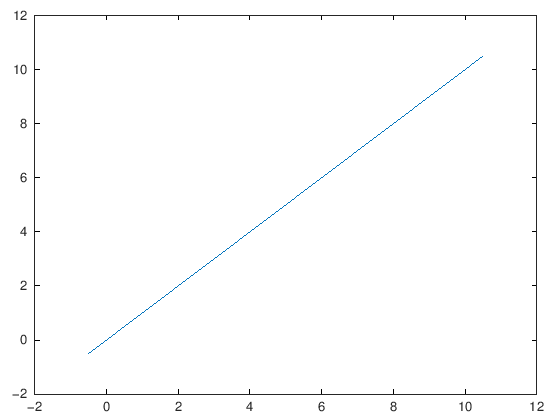

In [79]:
plot(xi,y0)

## Boundary Conditions

What happens at the boundary. We will use a periodic boundary for simplicity.

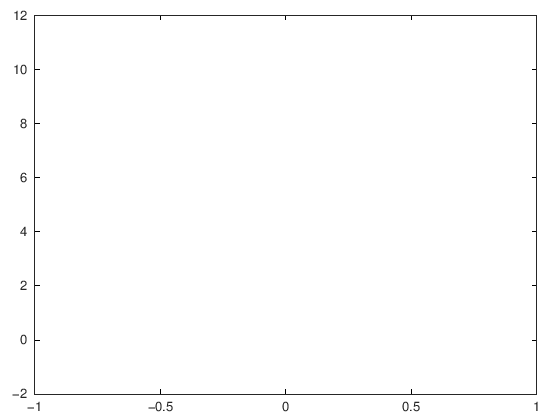

In [85]:
function [v] = update_boundary_condition(u,nghost,condition)
  v = u;
  switch (condition)
    case "periodic"
      for i = 1:nghost

      end
    end
end

y1 = update_boundary_condition(y0,'periodic',nghost);
plot(xi,y0,'b-.',xi,y1,'r-.')

## Time-update: marching forwards in time

How to compute the next time step based on the current value.

In [35]:
z = 2

z = 2


## Putting it all together: our first application

1. Define the problem parameters
2. Compute the grid
3. Compute initial condition
4. Apply boundary Conditions
5. March forward one step
6. Go back to step 4. 